<a href="https://colab.research.google.com/github/antipovaya/probability-theory-and-mathematical-statistics/blob/main/%D0%9D%D0%B5%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%82%D0%B5%D1%81%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Непараметрические тесты: теория и практика**

**Что такое непараметрические тесты?**

**Непараметрические тесты** - это статистические тесты, которые не делают предположений о распределении данных (нормальности). Они работают с рангами данных, а не с их исходными значениями.

**Преимущества:**
* Не требуют нормальности распределения

* Устойчивы к выбросам

* Работают с порядковыми данными

**Недостатки:**

* Менее мощные при выполнении условий для параметрических тестов

* Могут терять информацию при преобразовании в ранги

**1. Критерий Манна-Уитни (Mann-Whitney U test)**

**Теория**

**Назначение:** Сравнение двух независимых выборок
Альтернатива: t-тест для независимых выборок
Гипотезы:

H₀: Распределения двух выборок одинаковы

H₁: Распределения двух выборок различаются

**Задача**

Сравнить эффективность двух методов обучения. Результаты тестов:

Метод A: [72, 85, 88, 65, 90, 78, 82, 95, 68, 75]

Метод B: [80, 92, 85, 78, 88, 94, 82, 79, 86, 91]

In [1]:
import numpy as np
from scipy import stats

# Данные
method_a = np.array([72, 85, 88, 65, 90, 78, 82, 95, 68, 75])
method_b = np.array([80, 92, 85, 78, 88, 94, 82, 79, 86, 91])

# Проверка нормальности (для сравнения)
_, p_a = stats.shapiro(method_a)
_, p_b = stats.shapiro(method_b)
print(f"Тест Шапиро-Уилка: Метод A p={p_a:.3f}, Метод B p={p_b:.3f}")

# Критерий Манна-Уитни
statistic, p_value = stats.mannwhitneyu(method_a, method_b, alternative='two-sided')
print(f"\nКритерий Манна-Уитни:")
print(f"Статистика: {statistic}")
print(f"P-value: {p_value:.4f}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print("Отвергаем H₀: Методы обучения различаются по эффективности")
else:
    print("Не отвергаем H₀: Нет доказательств различий в эффективности методов")

# Дополнительно: расчет рангов
from scipy.stats import rankdata
all_data = np.concatenate([method_a, method_b])
ranks = rankdata(all_data)
print(f"\nРанги всех данных: {ranks}")

Тест Шапиро-Уилка: Метод A p=0.923, Метод B p=0.565

Критерий Манна-Уитни:
Статистика: 32.0
P-value: 0.1852
Не отвергаем H₀: Нет доказательств различий в эффективности методов

Ранги всех данных: [ 3.  11.5 14.5  1.  16.   5.5  9.5 20.   2.   4.   8.  18.  11.5  5.5
 14.5 19.   9.5  7.  13.  17. ]


**2. Критерий Уилкоксона (Wilcoxon signed-rank test)**

**Теория**

**Назначение:** Сравнение двух связанных (парных) выборок

Альтернатива: Парный t-тест

Гипотезы:

H₀: Медиана разниц равна нулю

H₁: Медиана разниц не равна нулю

**Задача**

Исследовать эффективность диеты. Измерен вес до и после:

До: [85, 78, 92, 88, 76, 81, 90, 84, 79, 86]

После: [82, 75, 88, 85, 74, 78, 87, 81, 76, 83]

In [2]:
# Данные
weight_before = np.array([85, 78, 92, 88, 76, 81, 90, 84, 79, 86])
weight_after = np.array([82, 75, 88, 85, 74, 78, 87, 81, 76, 83])

# Разницы
differences = weight_after - weight_before
print(f"Разницы в весе: {differences}")

# Проверка нормальности разниц
_, p_diff = stats.shapiro(differences)
print(f"Тест Шапиро-Уилка для разниц: p={p_diff:.3f}")

# Критерий Уилкоксона
statistic, p_value = stats.wilcoxon(weight_before, weight_after, alternative='two-sided')
print(f"\nКритерий Уилкоксона:")
print(f"Статистика: {statistic}")
print(f"P-value: {p_value:.4f}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print("Отвергаем H₀: Диета оказала статистически значимый эффект")
else:
    print("Не отвергаем H₀: Нет доказательств эффекта диеты")

# Дополнительно: расчет рангов абсолютных разниц
abs_differences = np.abs(differences)
signed_ranks = stats.rankdata(abs_differences) * np.sign(differences)
print(f"Ранги с знаками: {signed_ranks}")

Разницы в весе: [-3 -3 -4 -3 -2 -3 -3 -3 -3 -3]
Тест Шапиро-Уилка для разниц: p=0.000

Критерий Уилкоксона:
Статистика: 0.0
P-value: 0.0020
Отвергаем H₀: Диета оказала статистически значимый эффект
Ранги с знаками: [ -5.5  -5.5 -10.   -5.5  -1.   -5.5  -5.5  -5.5  -5.5  -5.5]


**3. Критерий Крускала-Уоллиса (Kruskal-Wallis test)**

**Теория**

**Назначение:** Сравнение трех и более независимых выборок

Альтернатива: Дисперсионный анализ (Односторонний ANOVA)

Гипотезы:

H₀: Все выборки происходят из одного распределения

H₁: Хотя бы одна выборка происходит из другого распределения

**Задача**

Сравнить эффективность трех различных методов лечения. Результаты:

Метод 1: [12, 15, 18, 14, 16]

Метод 2: [20, 22, 19, 21, 23]

Метод 3: [25, 28, 26, 27, 24]

Критерий Крускала-Уоллиса:
Статистика H: 12.5000
P-value: 0.0019
Отвергаем H₀: Существуют статистически значимые различия между методами лечения

Post-hoc анализ (критерий Данна):
          1       2         3
1  1.000000  0.2313  0.001221
2  0.231300  1.0000  0.231300
3  0.001221  0.2313  1.000000


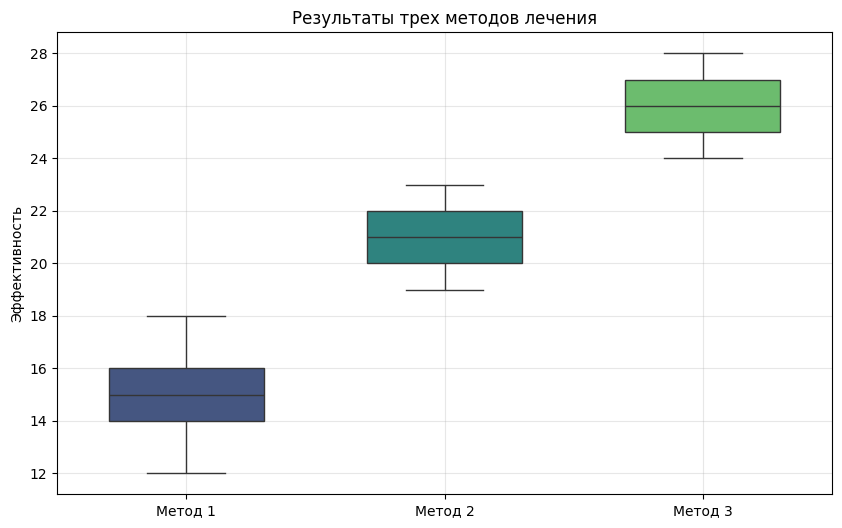

In [5]:
# Установите библиотеку scikit-posthocs
!pip install scikit-posthocs

# Данные
method1 = np.array([12, 15, 18, 14, 16])
method2 = np.array([20, 22, 19, 21, 23])
method3 = np.array([25, 28, 26, 27, 24])

# Критерий Крускала-Уоллиса
statistic, p_value = stats.kruskal(method1, method2, method3)
print("Критерий Крускала-Уоллиса:")
print(f"Статистика H: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print("Отвергаем H₀: Существуют статистически значимые различия между методами лечения")

    # Post-hoc анализ (критерий Данна)
    from scikit_posthocs import posthoc_dunn
    data = [method1, method2, method3]
    dunn_result = posthoc_dunn(data, p_adjust='bonferroni')
    print("\nPost-hoc анализ (критерий Данна):")
    print(dunn_result)
else:
    print("Не отвергаем H₀: Нет доказательств различий между методами лечения")

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
data_for_plot = {'Метод 1': method1, 'Метод 2': method2, 'Метод 3': method3}
sns.boxplot(data=list(data_for_plot.values()),
            whis=[0, 100], width=0.6, palette='viridis')
plt.title('Результаты трех методов лечения')
plt.ylabel('Эффективность')
plt.xticks([0, 1, 2], list(data_for_plot.keys()))
plt.grid(True, alpha=0.3)
plt.show()

**Критерий Данна: теория и интерпретация**

Что такое критерий Данна?

Критерий Данна — это непараметрический пост-хок тест, используемый после получения значимого результата в критерии Крускала-Уоллиса. Он предназначен для попарного сравнения групп и определения, какие именно группы различаются между собой.

Интерпретация вашей таблицы
Ваша таблица представляет собой матрицу p-values попарных сравнений:

                  1       2         3
          1  1.000000  0.2313  0.001221

          2  0.231300  1.0000  0.231300  

          3  0.001221  0.2313  1.000000


Расшифровка:

* Строки и столбцы 1, 2, 3 - это номера сравниваемых групп

* Диагональные значения (1.000000) - сравнение группы с самой собой (всегда 1.0)

* Недиагональные значения - p-values для попарных сравнений

Конкретные сравнения:

* Группа 1 vs Группа 2: p = 0.2313

* Группа 1 vs Группа 3: p = 0.001221

* Группа 2 vs Группа 3: p = 0.2313

**4. Критерий Фридмана (Friedman test)**

**Теория**

**Назначение:** Сравнение трех и более связанных выборок

Альтернатива: Повторные измерения ANOVA

Гипотезы:

H₀: Все методы одинаково эффективны

H₁: Хотя бы один метод отличается по эффективности

**Задача**

Сравнить три метода лечения на одних и тех же пациентах. Каждый пациент получал все три лечения в случайном порядке.

Критерий Фридмана:
Статистика χ²: 16.0000
P-value: 0.0003
Отвергаем H₀: Существуют статистически значимые различия между методами лечения

Post-hoc анализ (критерий Неменьи):
          0         1         2
0  1.000000  0.112183  0.000187
1  0.112183  1.000000  0.112183
2  0.000187  0.112183  1.000000


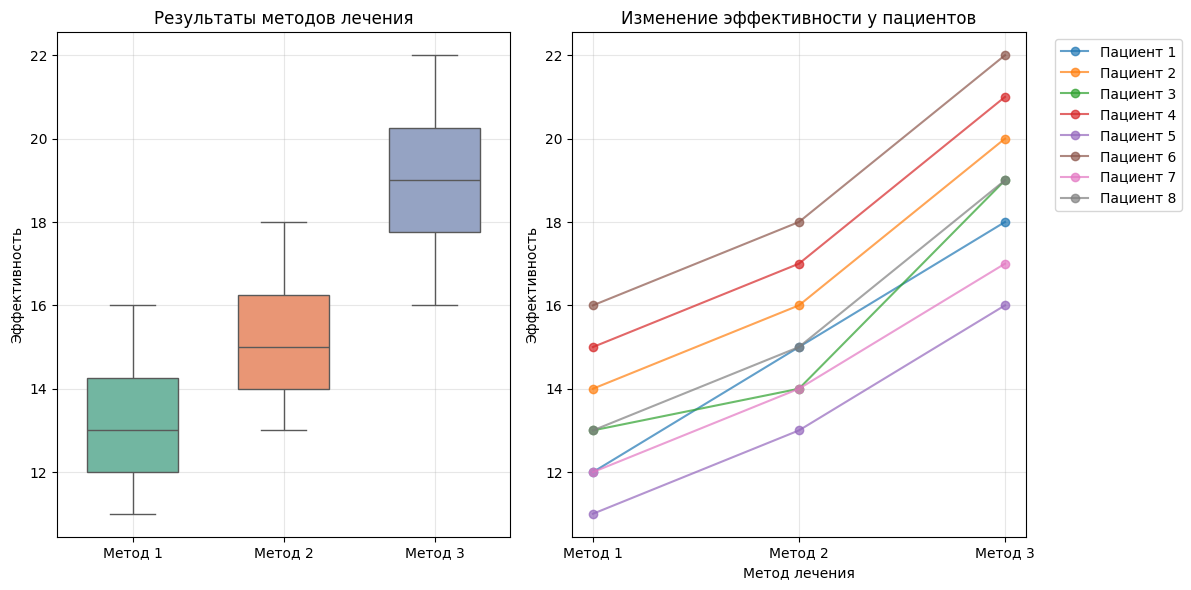

In [6]:
# Данные: строки - пациенты, столбцы - методы лечения
data = np.array([
    [12, 15, 18],  # Пациент 1
    [14, 16, 20],  # Пациент 2
    [13, 14, 19],  # Пациент 3
    [15, 17, 21],  # Пациент 4
    [11, 13, 16],  # Пациент 5
    [16, 18, 22],  # Пациент 6
    [12, 14, 17],  # Пациент 7
    [13, 15, 19]   # Пациент 8
])

# Критерий Фридмана
statistic, p_value = stats.friedmanchisquare(*data.T)
print("Критерий Фридмана:")
print(f"Статистика χ²: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print("Отвергаем H₀: Существуют статистически значимые различия между методами лечения")

    # Post-hoc анализ (критерий Неменьи)
    try:
        from scikit_posthocs import posthoc_nemenyi_friedman
        nemenyi_result = posthoc_nemenyi_friedman(data)
        print("\nPost-hoc анализ (критерий Неменьи):")
        print(nemenyi_result)
    except ImportError:
        print("\nДля post-hoc анализа установите scikit-posthocs: pip install scikit-posthocs")
else:
    print("Не отвергаем H₀: Нет доказательств различий между методами лечения")

# Визуализация
plt.figure(figsize=(12, 6))

# Боксплот для каждого метода
plt.subplot(1, 2, 1)
sns.boxplot(data=data, whis=[0, 100], width=0.6, palette='Set2')
plt.title('Результаты методов лечения')
plt.ylabel('Эффективность')
plt.xticks([0, 1, 2], ['Метод 1', 'Метод 2', 'Метод 3'])
plt.grid(True, alpha=0.3)

# Линейный график для каждого пациента
plt.subplot(1, 2, 2)
for i in range(data.shape[0]):
    plt.plot(range(1, 4), data[i], marker='o', label=f'Пациент {i+1}', alpha=0.7)
plt.title('Изменение эффективности у пациентов')
plt.xlabel('Метод лечения')
plt.ylabel('Эффективность')
plt.xticks([1, 2, 3], ['Метод 1', 'Метод 2', 'Метод 3'])
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Критерий Неменьи: теория и интерпретация**

Что такое критерий Неменьи?

Критерий Неменьи (Nemenyi test) — это непараметрический пост-хок тест, используемый после получения значимого результата в критерии Фридмана. Он предназначен для попарного сравнения нескольких связанных (зависимых) групп.

Отличие от критерия Данна

В то время как критерий Данна используется после Крускала-Уоллиса (для независимых групп), критерий Неменьи используется после критерия Фридмана (для связанных групп).

Пример матрицы критерия Неменьи

Предположим, у нас есть такая матрица:


          1         2         3
    1  1.000000  0.043200  0.001100
    2  0.043200  1.000000  0.312000
    3  0.001100  0.312000  1.000000
Интерпретация:

* Группа 1 vs Группа 2: p = 0.0432

* Группа 1 vs Группа 3: p = 0.0011

* Группа 2 vs Группа 3: p = 0.3120

In [7]:
# Сравнение параметрических и непараметрических тестов
def compare_tests(data1, data2):
    print("Сравнение параметрических и непараметрических тестов:")
    print("=" * 50)

    # Проверка нормальности
    _, p1 = stats.shapiro(data1)
    _, p2 = stats.shapiro(data2)
    print(f"Нормальность данных 1: p={p1:.3f}")
    print(f"Нормальность данных 2: p={p2:.3f}")

    # Проверка равенства дисперсий
    _, p_var = stats.levene(data1, data2)
    print(f"Равенство дисперсий: p={p_var:.3f}")

    print("\nРезультаты тестов:")
    print("-" * 30)

    # t-тест (параметрический)
    t_stat, t_p = stats.ttest_ind(data1, data2)
    print(f"t-тест: p={t_p:.4f}")

    # Критерий Манна-Уитни (непараметрический)
    u_stat, u_p = stats.mannwhitneyu(data1, data2)
    print(f"Манна-Уитни: p={u_p:.4f}")

    # Интерпретация
    alpha = 0.05
    print(f"\nПри α={alpha}:")
    if t_p < alpha and u_p < alpha:
        print("Оба теста показывают значимые различия")
    elif t_p >= alpha and u_p >= alpha:
        print("Оба теста не показывают значимых различий")
    elif t_p < alpha and u_p >= alpha:
        print("t-тест показывает различия, но Манна-Уитни - нет")
    else:
        print("Манна-Уитни показывает различия, но t-тест - нет")

# Пример сравнения
data_normal1 = np.random.normal(50, 10, 30)
data_normal2 = np.random.normal(55, 10, 30)
compare_tests(data_normal1, data_normal2)

Сравнение параметрических и непараметрических тестов:
Нормальность данных 1: p=0.343
Нормальность данных 2: p=0.562
Равенство дисперсий: p=0.489

Результаты тестов:
------------------------------
t-тест: p=0.0164
Манна-Уитни: p=0.0436

При α=0.05:
Оба теста показывают значимые различия
